In [1]:

import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import os

In [4]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

## Data Analysis

In [5]:
test_df = pd.read_csv(r"D:\Projects\Titanic Survival Rate Prediction\test.csv")
train_df = pd.read_csv(r"D:\Projects\Titanic Survival Rate Prediction\train.csv")

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
total = train_df.isnull().sum().sort_values(ascending=False)

percent = train_df.isnull().sum()/train_df.isnull().count()*100

percent_null = (round(percent, 1)).sort_values(ascending=False)


In [10]:
missing = pd.concat([total, percent_null], axis=1, keys=['Total', 'miss%'])
missing.head(7)

,Total,miss%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0


In [11]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## Data Dependencies

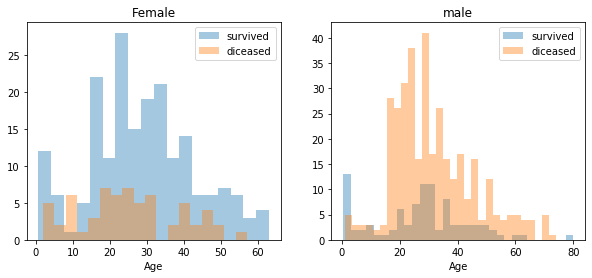

In [12]:
survived = 'survived'
diceased = 'diceased'
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
men = train_df[train_df['Sex']=='male']
women = train_df[train_df['Sex']=='female']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=18, label = diceased, ax = axes[0], kde =False)
ax.set_title('Female')
ax.legend()
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=30, label = survived, ax = axes[1], kde =False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=30, label = diceased, ax = axes[1], kde =False)
ax.set_title('male')
ax.legend()

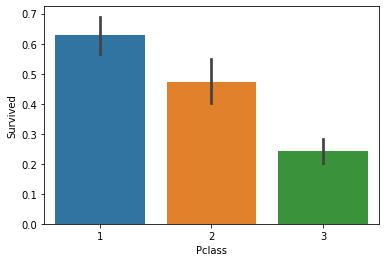

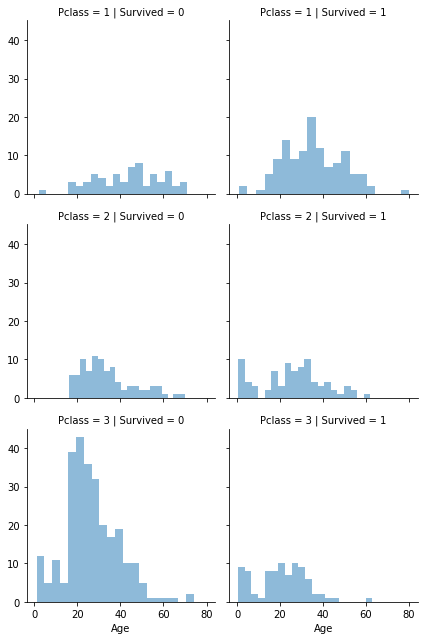

In [13]:
sns.barplot(x='Pclass',y='Survived', data= train_df)
g = sns.FacetGrid(train_df, col="Survived", row="Pclass")
g.map(plt.hist, 'Age', alpha=.5, bins=20)

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


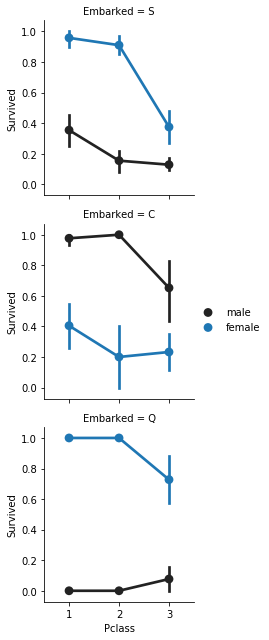

In [14]:
grid = sns.FacetGrid(train_df, row="Embarked")
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None)
grid.add_legend()

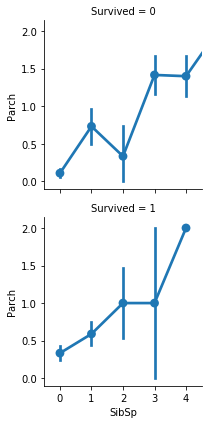

In [15]:
grid1 = sns.FacetGrid(train_df, row="Survived")
grid1.map(sns.pointplot, 'SibSp', 'Parch', order=None)
grid1.add_legend()

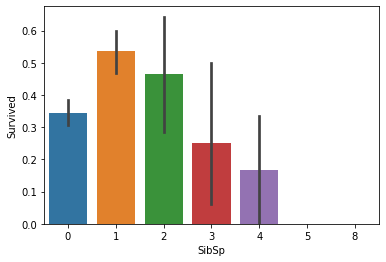

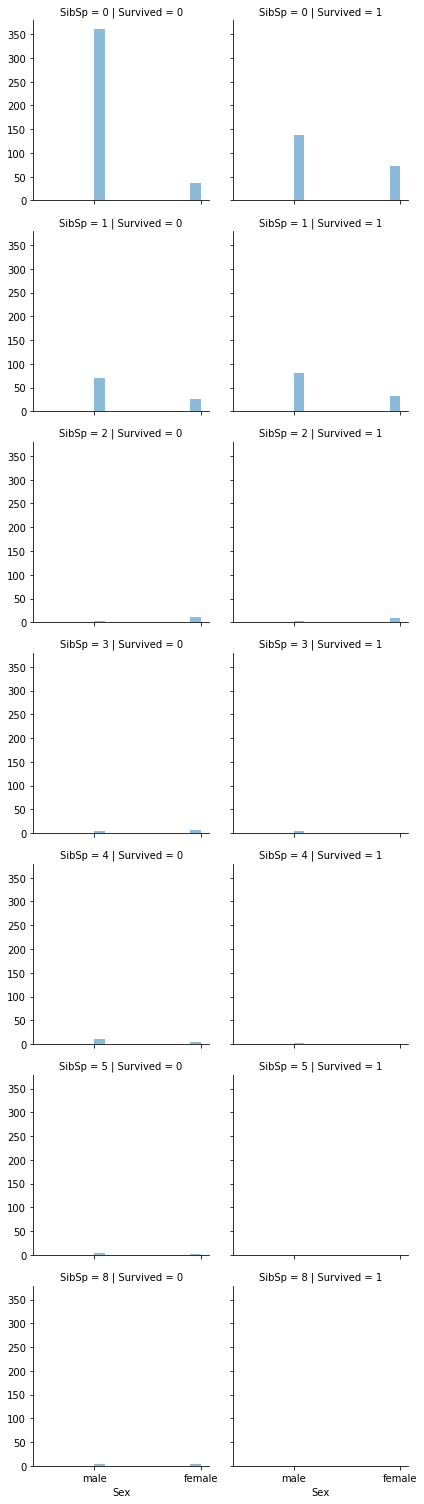

In [16]:
sns.barplot(x='SibSp',y='Survived', data= train_df)
g1 = sns.FacetGrid(train_df, col="Survived", row="SibSp")
g1.map(plt.hist, 'Sex', alpha=.5, bins=10)

D:\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


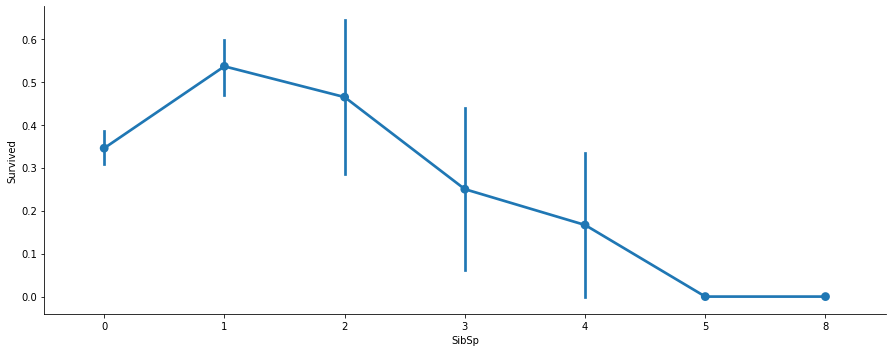

In [17]:
axes = sns.factorplot('SibSp','Survived', 
                      data=train_df, aspect = 2.5, )

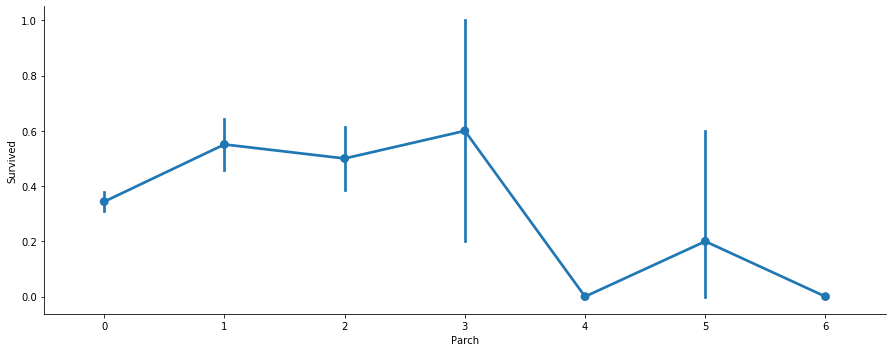

In [18]:
axes = sns.factorplot('Parch','Survived', 
                      data=train_df, aspect = 2.5, )

### creating a feature to decide number of family members on ship

In [19]:
data = [train_df, test_df]
for dataset in data:
    dataset['family'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['family'] > 0, 'alone'] = 0
    dataset.loc[dataset['family'] == 0, 'alone'] = 1
    dataset['alone'] = dataset['alone'].astype(int)

In [20]:
train_df['alone'].value_counts()

1    537
0    354
Name: alone, dtype: int64

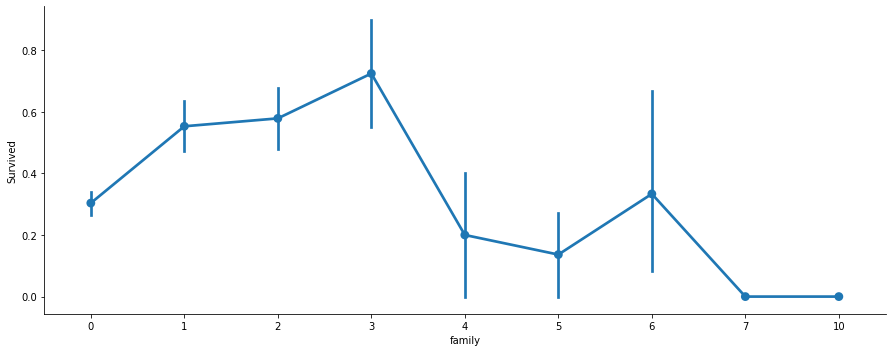

In [21]:
axes = sns.factorplot('family','Survived', 
                      data=train_df, aspect = 2.5, )

### Preprocessing

In [22]:
#train_df = train_df.drop('PassengerId', axis = 1)
#train_df = train_df.drop("PassengerId",axis=0, inplace =True)
#train_df = train_df.drop(columns=["PassengerId"], axis = 1)
train_df.drop('PassengerId', axis=1, inplace=True)

In [23]:
import re

In [24]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]
#cabin feature
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [25]:
train_df = train_df.drop(['Cabin'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1)

In [26]:
#embarked
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [27]:
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna("S")

In [28]:
# for none values of Age
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [29]:


train_df["Age"].isnull().sum()

0

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
family      891 non-null int64
alone       891 non-null int32
Deck        891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


## converting features to numerics

In [31]:
#sex
genders = {"female": 0, "male": 1}
data = [train_df, test_df]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [32]:
#dropping ticket
train_df.drop('Ticket', axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)

In [33]:
#fare
data = [train_df, test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [34]:
#embarked
ports = {"C": 0, "Q": 1, "S": 2}
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [35]:
train_df['Name'].describe()

count                    891
unique                   891
top       Willey, Mr. Edward
freq                       1
Name: Name, dtype: object

In [36]:
#name
data = [train_df, test_df]
titles = {"Mrs":1, "Miss":2,"Mr":3, "Master":4,"Other":5}
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Miss')
    dataset['Title'] = dataset['Title'].replace(['Countess','Capt','Col','Major','Rev','Lady','Sir','Don','Dr','Dona','Jonkheer'],'Other')
    dataset['Title'] = dataset['Title'].map(titles)

In [37]:
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

In [38]:
train_df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,alone,Deck,Title
0,0,3,1,22,1,0,7,2,1,0,8,3
1,1,1,0,38,1,0,71,0,1,0,3,1
2,1,3,0,26,0,0,7,2,0,1,8,2
3,1,1,0,35,1,0,53,2,1,0,3,1
4,0,3,1,35,0,0,8,2,0,1,8,3
5,0,3,1,30,0,0,8,1,0,1,8,3
6,0,1,1,54,0,0,51,2,0,1,5,3
7,0,3,1,2,3,1,21,2,4,0,8,4
8,1,3,0,27,0,2,11,2,2,0,8,1
9,1,2,0,14,1,0,30,0,1,0,8,1


In [39]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 34), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 34) & (dataset['Age'] <= 42), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 42) & (dataset['Age'] <= 100000), 'Age'] = 6

In [40]:
train_df['Age'].value_counts()

4    190
5    147
3    144
6    129
2    117
1     96
0     68
Name: Age, dtype: int64

In [41]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,alone,Deck,Title
0,0,3,1,2,1,0,7,2,1,0,8,3
1,1,1,0,5,1,0,71,0,1,0,3,1
2,1,3,0,3,0,0,7,2,0,1,8,2
3,1,1,0,5,1,0,53,2,1,0,3,1
4,0,3,1,5,0,0,8,2,0,1,8,3


In [42]:
#fare
train_df['Fare'].value_counts()

7     213
8      70
26     57
13     50
10     28
     ... 
59      1
47      1
42      1
40      1
38      1
Name: Fare, Length: 91, dtype: int64

In [43]:
data = [train_df, test_df]
for dataset in data:
    dataset.loc[dataset['Fare'] <= 8,'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14.5),'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.5) & (dataset['Fare'] <= 30),'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100),'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 100) & (dataset['Fare'] <= 250),'Fare'] = 4
    dataset.loc[dataset['Fare'] > 250,'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    

In [44]:
train_df['Fare'].value_counts()

0    311
2    209
3    172
1    146
4     44
5      9
Name: Fare, dtype: int64

In [45]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,alone,Deck,Title
0,0,3,1,2,1,0,0,2,1,0,8,3
1,1,1,0,5,1,0,3,0,1,0,3,1
2,1,3,0,3,0,0,0,2,0,1,8,2
3,1,1,0,5,1,0,3,2,1,0,3,1
4,0,3,1,5,0,0,0,2,0,1,8,3


## Creating new Features

In [46]:
# Fare per person
for dataset in data:
    dataset['Fare_per_Person'] = dataset['Fare']/(dataset['family']+1)
    dataset['Fare_per_Person'] = dataset['Fare_per_Person'].astype(int)

In [47]:
#class times age
for dataset in data:
    dataset['Age_Class'] = dataset['Age']* dataset['Pclass']

In [48]:
train_df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,alone,Deck,Title,Fare_per_Person,Age_Class
0,0,3,1,2,1,0,0,2,1,0,8,3,0,6
1,1,1,0,5,1,0,3,0,1,0,3,1,1,5
2,1,3,0,3,0,0,0,2,0,1,8,2,0,9
3,1,1,0,5,1,0,3,2,1,0,3,1,1,5
4,0,3,1,5,0,0,0,2,0,1,8,3,0,15
5,0,3,1,4,0,0,0,1,0,1,8,3,0,12
6,0,1,1,6,0,0,3,2,0,1,5,3,3,6
7,0,3,1,0,3,1,2,2,4,0,8,4,0,0
8,1,3,0,3,0,2,1,2,2,0,8,1,0,9
9,1,2,0,1,1,0,2,0,1,0,8,1,1,2


## Training different models

In [49]:
X_train = train_df.drop('Survived', axis = 1)

In [50]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,alone,Deck,Title,Fare_per_Person,Age_Class
0,3,1,2,1,0,0,2,1,0,8,3,0,6
1,1,0,5,1,0,3,0,1,0,3,1,1,5
2,3,0,3,0,0,0,2,0,1,8,2,0,9
3,1,0,5,1,0,3,2,1,0,3,1,1,5
4,3,1,5,0,0,0,2,0,1,8,3,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,3,0,0,1,2,0,1,8,5,1,6
887,1,0,2,0,0,2,2,0,1,2,2,2,2
888,3,0,3,1,2,2,2,3,0,8,2,0,9
889,1,1,3,0,0,2,0,0,1,3,3,2,3


In [51]:
Y_train = train_df["Survived"]

In [52]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [54]:
X_test = test_df.drop("PassengerId", axis = 1).copy()

In [55]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family,alone,Deck,Title,Fare_per_Person,Age_Class
0,3,1,2,0,0,0,1,0,1,8,3,0,6
1,3,0,5,1,0,0,2,1,0,8,1,0,15
2,2,1,3,0,0,1,1,0,1,8,3,1,6
3,3,1,5,0,0,0,2,0,1,8,3,0,15
4,3,0,5,1,1,1,2,2,0,8,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,5,0,0,0,2,0,1,8,3,0,15
414,1,0,6,0,0,4,0,0,1,3,5,4,6
415,3,1,3,0,0,0,2,0,1,8,3,0,9
416,3,1,4,0,0,0,2,0,1,8,3,0,12


In [66]:
sto_grad_des = linear_model.SGDClassifier(max_iter=12, tol=None)
sto_grad_des.fit(X_train, Y_train)
Y_pred = sto_grad_des.predict(X_test)

sto_grad_des.score(X_train, Y_train)

acc_sgd = round(sto_grad_des.score(X_train, Y_train) * 100, 2)

In [67]:
acc_sgd

80.02

In [78]:
perceptron = Perceptron(max_iter=20)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_percep = round(perceptron.score(X_train, Y_train) * 100, 2)

In [79]:
acc_percep

77.78

In [86]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
acc_log

80.58

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

In [89]:
linear_svm = LinearSVC()
linear_svm.fit(X_train, Y_train)
Y_pred = linear_svm.predict(X_test)
acc_linear_svm= round(linear_svm.score(X_train, Y_train) * 100, 2)

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [98]:
acc_linear_svm

80.36

In [99]:
random_forest = RandomForestClassifier(n_estimators=150)
random_forest.fit(X_train,Y_train)

Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train,Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [100]:
acc_random_forest

92.48

In [101]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [102]:
acc_decision_tree

92.48

### K-fold Cross Validation

In [103]:
from sklearn.model_selection import cross_val_score
random_for = RandomForestClassifier(n_estimators=150)
scores = cross_val_score(random_for, X_train, Y_train, cv=20, scoring = "accuracy")


In [105]:
print("Scores:",scores)
print("Mean",scores.mean())
print("std. dev",scores.std())

Scores: [0.73913043 0.86956522 0.75555556 0.82222222 0.75555556 0.77777778
 0.77777778 0.88888889 0.88888889 0.81818182 0.84090909 0.81818182
 0.84090909 0.86363636 0.77272727 0.72727273 0.81818182 0.84090909
 0.81818182 0.84090909]
Mean 0.8137681159420291
std. dev 0.046950476335999095


In [111]:
final_accuracy = (100*(scores.mean()))
print("The final accuracy of our Random Forest Prediction Model is: ", "{:.5f}".format(final_accuracy))

The final accuracy of our Random Forest Prediction Model is:  81.37681
